# Chapter 5: Differential Equations

In this chapter, we'll cover ordinary and partial differential equations. 

As usual, we start by loading numpy and matplotlib (and this time random):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 4.1 Poisson Equation

Recall in Chapter 3 that the diffusion equation was given by
$$\frac{\partial P(x,t)}{\partial t}=D\frac{\partial^2 P(x,t)}{\partial x^2},$$
where the diffusion constant $D\equiv a^2/2\tau$. This was derived starting from the random walk. This derivation made use of the definition of the second derivative
$$\frac{\partial^2 P(x,t)}{\partial x^2}\equiv\lim_{a\to 0}
\frac{P(x+a,t)+P(x-a,t)-2P(x,t)}{a^2}.$$
On a computer, it is (almost) always necessary to approximate continuous variables like $x$ by a set of closely (but finitely) spaced points; in this case, the value of $a$ remains finite. The right hand side of the above equation is therefore an approximation to the second derivative, called a finite difference. Note that the right hand side looks just like the definition of a Markov chain if the variable $P(x)$ corresponds to a probability distribution.

Suppose that the time-dependence is zero, so that the function is constant in time, but not necessarily constant in space. Then we would have
$$\frac{d^2 f(x)}{d x^2}=0,$$
which corresponds to the one-dimensional Poisson equation if $f\to V$, where $V$ is the potential function. Then we have
$$\frac{V(x+a)+V(x-a)-2V(x)}{a^2}=0\quad\Rightarrow\quad V(x)=\frac{V(x+a)+V(x-a)}{2}.$$
Because this is a second-order differential equation, a unique solution requires two boundary conditions. Usually these would be chosen as the value of the potential at two endpoints, but it could also be (for example) the value of the potential and its first derivative and a single point. Given that the potential at any given point is given by the potential of its nearest neighbours, it should be possible to solve for $V(x)$ using an iterative approach: start with a random choice for the $V(x_j)$ at the points $x_j=aj$ ($j=0,1,\ldots,N-1$ where $N$ is the number of points), then on each iteration recalculate the potential at each $x_j$ by summing over its nearest neighbours. After a sufficient number of iterations the potential should converge.

In the presence of an additional (external) source term $\rho(x)$, the Poisson equation becomes
$$\frac{d^2 V(x)}{d x^2}=\frac{V(x+a)+V(x-a)-2V(x)}{a^2}=\rho(x).$$
For this inhomogeneous differential equation, we can again solve for the potential at site $x_j$:
$$V(x_j)=\frac{V(x_j+a)+V(x_j-a)-a^2\rho(x_j)}{2},$$
and the numerical procedure follows in analogy with the homogeneous case above.

It is worthwhile to consider the special case of boundary conditions, a situation that arises often in physics. Then we can expand the potential in a Fourier series
$$V(x)=\frac{1}{\sqrt{N}}\sum_k e^{ikx}\phi(k).$$
Because the potential is the solution of a second-order differential equation, and also periodic, the value of the potential and its derivative coincide at the left and right boundaries, i.e. $V(0)=V(L)$ and $V'(0)=V'(L)$. The first condition gives 
$$\frac{1}{\sqrt{N}}\sum_k\phi(k)=\frac{1}{\sqrt{N}}\sum_k e^{ikL}\phi(k)=V.$$
To ensure that both terms on the left hand side are equal, we must choose wave vectors $k=2\pi n/L$, where $n=1,2,\ldots,N$, and therefore
$$V(x)=\frac{1}{\sqrt{N}}\sum_n e^{i2\pi nx/L}\phi(n).$$
It's easy to verify that the second boundary condition is also automatically satisfied.  The inhomogeneous Poisson equation then becomes
$$\frac{d^2}{d x^2}V(x)=\frac{d^2}{d x^2}\frac{1}{\sqrt{N}}\sum_n e^{i 2\pi nx/L}\phi(n)=-\frac{1}{\sqrt{N}}\sum_n\left(\frac{2\pi n}{L}\right)^2e^{i 2\pi nx/L}\phi(n)=\rho(x).$$
Then, for each $x_j=aj$, $j=1,2,\ldots,N$, the equation becomes
$$\frac{1}{\sqrt{N}}\sum_n n^2e^{i 2\pi a nj/L}\phi(n)=-\left(\frac{L}{2\pi}\right)^2\rho(j).$$

The Fourier transform has transformed the inhomogeneous second-order differential equation to a set of algebraic equations. Suppose that the $\phi(n)$ is a vector of length $N$ with terms $\phi=[\phi(0),\phi(1),\ldots,\phi(N-1)]$ and likewise for the source term, $\rho=[\rho(0),\rho(1),\ldots,\rho(N-1)]$. Then the above equation reads as $M\phi=\rho$, where $M$ is an $N\times N$ matrix. For the example above, the matrix is
$$M=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi a/L} & 4e^{i 2\pi a 2/L} & \cdots & N^2e^{i 2\pi a N/L}\cr
e^{i 2\pi a 2/L} & 4e^{i 2\pi a 4/L} & \cdots & N^2e^{i 2\pi a 2N/L}\cr
\vdots & \vdots & \ddots & \vdots\cr
e^{i 2\pi a N/L} & 4e^{i 2\pi a 2N/L} & \cdots & N^2e^{i 2\pi a N^2/L}\cr
\end{pmatrix}$$
This can be simplified slightly by noting that $a=L/N$:
$$M=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi/N} & 4e^{i 4\pi/N} & \cdots & N^2e^{i 2\pi}\cr
e^{i 4\pi/N} & 4e^{i 8\pi/N} & \cdots & N^2e^{i 4\pi}\cr
\vdots & \vdots & \ddots & \vdots\cr
e^{i 2\pi} & 4e^{i 4\pi} & \cdots & N^2e^{i 2\pi N}\cr
\end{pmatrix}
=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi/N} & 4e^{i 4\pi/N} & \cdots & N^2\cr
e^{i 4\pi/N} & 4e^{i 8\pi/N} & \cdots & N^2\cr
\vdots & \vdots & \ddots & \vdots\cr
1 & 4 & \cdots & N^2\cr
\end{pmatrix}.$$
The goal is to solve for $\phi$ given $M$ and $\rho$. This can be done in (at least) two ways. One is to call a standard linear system solver, for example numpy.linalg.solve. Alternatively, as long as $M$ isn't singular (i.e. if its determinant isn't zero), then one can obtain $\phi$ directly by inverting $M$: $\phi=M^{-1}\rho$; for this one can employ numpy.linalg.inv.

There's another way to solve the system using the Fourier method. One can also expand the source term in a Fourier series,
$$\rho(j)=\frac{1}{\sqrt{N}}\sum_n e^{i2\pi nj/N}r(n),$$
where $r(n)$ is the (discrete) Fourier transform of $\rho(x)$. Then
$$\frac{1}{\sqrt{N}}\sum_n n^2e^{i 2\pi nj/N}\phi(n)=-\left(\frac{L}{2\pi}\right)^2\frac{1}{\sqrt{N}}\sum_n e^{i2\pi nj/N}r(n),$$
which gives
$$\phi(n)=-\left(\frac{L}{2\pi n}\right)^2r(n).$$
Given that we can solve for $r(n)$ directly from the source term,
$$r(n)=\frac{1}{\sqrt{N}}\sum_je^{-i 2\pi nj/N}\rho(j),$$
this allows for the direct solution for $\phi(n)$ and therefore of $V(x)$,
$$V(j)=\frac{1}{\sqrt{N}}\sum_ne^{i 2\pi nj/N}\phi(n).$$

**Problem 1 (10 points):** Write a program to solve the 1D homogeneous Poisson equation, using the finite-difference approximation to the second derivative, subject to the boundary conditions $V(0)=0$ and $V(1)=1$ in the interval $0\leq x\leq 1$. Use a random initial state and the iterative method discussed above. Make a movie to show the approach to convergence; I use animation.ArtistAnimation. Check that the answer is correct.



In [2]:
#Q1
#The basic idea is simple. My code, on the other hand, is failing.
#Just smooth out an array, by having each point in the average next be the average of its neighbours.
#The float issue sucks.
#Update: Code works now. The issue was that numpy initializes the array to an integer array, which denies any floating point stuff. Changing it to more conventional lists fixed the problem completely.

import numpy as np

"""
This is the smoothing function. It takes a list, and then makes each
value the average of its neighbours, subject to boundary conditions.
It does the 1d poisson equation basically.
Params:
  arr: The input list of numbers. Can be anything.
  start: The starting boundary condition.
  end: The endpoint boundary condition.
  src: A function that takes in a number and returns a number. Meant to be the driving source for the poisson equation.
"""
def smooth(arr, start, end, src = lambda a: 0):
  newArr = []
  newArrLen = len(arr)
  arrEnd = newArrLen-1

  a = 1 / (newArrLen)
 
  for i in range(newArrLen):
    if i == 0:
      newArr.append(start) #It's simplier than I thought; just straight up dictate it to be the start val
    elif i == (arrEnd):
      newArr.append(end) #It's just straight up the ending value
    else:
      val = (arr[i-1] + arr[i+1] - a**2 * src(i*a))/2 #SRC(i*a), NOTTTTTTTTTT SRC(arr[i]). FFFFFFFFFF.
      newArr.append(val)
  return newArr

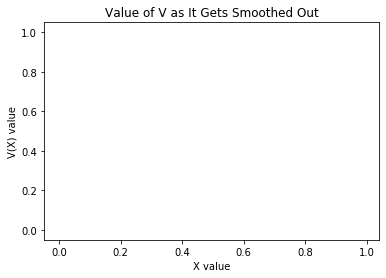

In [3]:
import random
from matplotlib import animation, rc, pyplot as plt

#Most of this code by Prof. Feder. My code is simply calling my smoothing function.

#Figure specifics.
fig = plt.figure()
plt.title("Value of V as It Gets Smoothed Out")
plt.xlabel("X value")
plt.ylabel("V(X) value")

#Calculation values.
xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
V = [random.random() for i in range(xgrid)]  # initialize V as a random


iterations=8000
ims = []
for iter in range(iterations):
    
    #My code
    oldV = V
    V = smooth(oldV, 0, 1)
    
    if (iter % 10 == 0):
        im = plt.plot(xvals,V,color='black', label = "Iteration: {}".format(iter))
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

#### Tada! Result is as above.

#### Consider that if the second derrivative is zero, the integrating it gives us a constant, and then again we get c1 * x + c2 = V(X) as the expected answer. This is linear, so we expect the smoothed out graph to be linear... which it is. With those boundary conditions we expect C1 to be 1, and c2 to be 0, which eyeballing, it again is, so this method produced the correct result.

**Problem 2 (10 points):** 
$$V(x_j)=\frac{V(x_j+a)+V(x_j-a)-a^2\rho(x_j)}{2},$$
Now write a program to solve the 1D inhomogeneous Poisson equation, using the finite-difference approximation to the second derivative, subject to the boundary conditions $V(0)=0$ and $V(1)=0$ in the interval $0\leq x\leq 1$. Assume that the source term has a Gaussian form,
$$\rho(x)=10e^{-100(x-1/2)^2}.$$
Again, make a movie to show the approach to convergence. Check that the answer is correct; using Mathematica, I obtained the result
$$V(x)=\frac{e^{-100(x-1/2)^2}}{20}+\frac{\sqrt{\pi}}{4}\left[(1-2x)\mbox{Erf}(5-10x)-\mbox{Erf}(5)\right],$$
where 
$$\mbox{Erf}(z)\equiv\frac{2}{\sqrt{\pi}}\int_0^ze^{-t^2}dt.$$


In [4]:
#Q2
"""
Source Term
"""
def src2(x):
  expVal = (-1)*100*((x-(1/2))**2)
  return 10*np.exp(expVal)

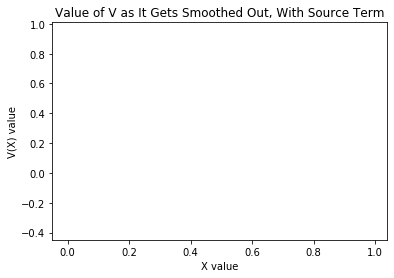

In [5]:
import random
from matplotlib import animation, rc, pyplot as plt

#Most of this code by prof. Feder. My code is simply calling my smoothing function.

#Figure details.
fig = plt.figure()
plt.title("Value of V as It Gets Smoothed Out, With Source Term")
plt.xlabel("X value")
plt.ylabel("V(X) value")

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
V = [random.random() for i in range(xgrid)]  # initialize V as a random

iterations=10000
ims = []
for iter in range(iterations):
    
    #My code
    oldV = V
    V = smooth(oldV, 0, 0, src2)
    
    if (iter % 100 == 0):
        im = plt.plot(xvals,V,color='black', label = "Iteration: {}".format(iter))
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

#### This looks right. Let's check against the theory.

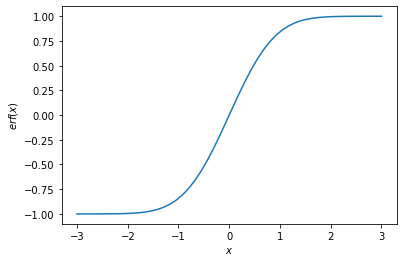

In [6]:
#Test - Error Function
from scipy import special
import matplotlib.pyplot as plt
x = np.linspace(-3, 3)
plt.plot(x, special.erf(x))
plt.xlabel('$x$')
plt.ylabel('$erf(x)$')
plt.show()

$$V(x)=\frac{e^{-100(x-1/2)^2}}{20}+\frac{\sqrt{\pi}}{4}\left[(1-2x)\mbox{Erf}(5-10x)-\mbox{Erf}(5)\right],$$

In [7]:
import scipy as sp
from scipy import special

"""
This is the analytic value of V(X) that Prof. Feder Calculated. If it matches up with our experimental results, our experimental results are good.
"""
def Vfunc(X):
  t1 = (src2(X) / 200)
  multiplier = np.sqrt((sp.pi))/4
  t21 = (1-2*X)*special.erf(5-10*X)
  t22 = special.erf(5)
  t2 = multiplier * (t21 - t22)
  return t1 + t2

Text(0, 0.5, 'V(X) value')

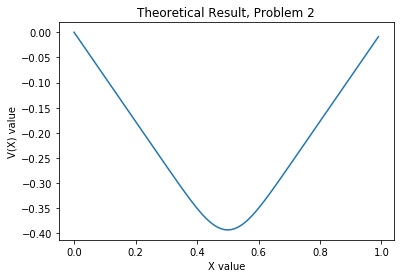

In [8]:
vVal = []
for entry in xvals:
  val = Vfunc(entry)
  vVal.append(val)

plt.plot(xvals, vVal)
plt.title("Theoretical Result, Problem 2")
plt.xlabel("X value")
plt.ylabel("V(X) value")

### So, the theoretical result is as above, as derrived by prof. Feder. Compared to our actual result, our actual result converges to what happears to be the same shape and value after the differences in y scale are accounted for, so the result is correct.


**Problem 3 (10 points):** Solve problems 1 and 2 above, but now by encoding the finite-difference approximation to the second derivative as a tridiagonal matrix. Use a linear system solver for both problems, and direct matrix inversion for tackling the inhomogenous differential equation in problem 2. 

### No movie, there is no evolution. Can make graph though.


In [9]:
#To impose: MV = P, P1 and Pn have to be boundary condition terms, everything else in P is the normal P2 to Pn-1 terms.
#Goal: Solve for V.

"""
Generates the N by N matrix 
By setting the first and last row's first and then last parts to 1, we can force the boundary condition in rho.
"""
def genMat(N):
  mat = []
  for i in range(N):
    row = [0]*i + [1] + [-2] + [1] + [0]*(N-i)
    row = row[1:len(row)-2]
    mat.append(row)
  #Now do something funny to the first and last rows.
  # Make matrix that enforces endpoint conditions??
  fstRowi = 0
  lstRowi = len(mat)-1
  mat[fstRowi] = [1] + [0]*(N-1)
  mat[lstRowi] = [0]*(N-1) + [1]

  return mat

In [10]:
#Sanity Testing our matrix
mat = genMat(10)
for row in mat:
  print(row)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, -2, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, -2, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, -2, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, -2, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, -2, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, -2, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, -2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1, -2, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


Text(0, 0.5, 'V(X) value')

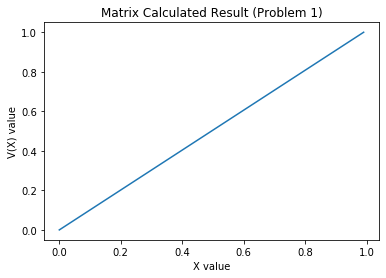

In [11]:
#Question 1
xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]

start = 0
end = 1
size = 100

resultV = np.linalg.solve(genMat(size), [start] + [0]*(size - 2) + [end])

plt.plot(xvals, resultV)
plt.title("Matrix Calculated Result (Problem 1)")
plt.xlabel("X value")
plt.ylabel("V(X) value")

#### This is identical to what we got for Q1 - the answer is correct!

Text(0, 0.5, 'V(X) value')

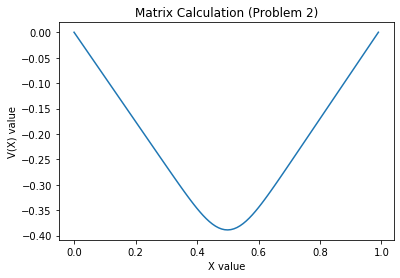

In [12]:
#Question 2
xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
a = 1/xgrid

start = 0
end = 0

middleResults = []
for i in range(1, xgrid-1):
  pumpVal = src2(xvals[i])
  pumpVal = pumpVal*a**2
  middleResults.append(pumpVal)

rhoVec = [start] + middleResults + [end]

resultV = np.linalg.solve(genMat(size), rhoVec)

plt.plot(xvals, resultV)
plt.title("Matrix Calculation (Problem 2)")
plt.xlabel("X value")
plt.ylabel("V(X) value")

#### Again this is identical to our theoretical result, graphically. Our results are correct!

Text(0, 0.5, 'V(X) value')

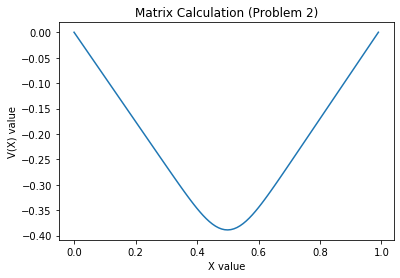

In [13]:
#Question 2: Direct Matrix Inversion
xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
a = 1/xgrid

start = 100
end = 100

middleResults = []
for i in range(1, xgrid-1):
  pumpVal = src2(xvals[i])
  pumpVal = pumpVal*a**2
  middleResults.append(pumpVal)

rhoVec = [start] + middleResults + [end]

invMat = np.linalg.inv(genMat(size))
result = np.dot(invMat, rhoVec)

plt.plot(xvals, resultV)
plt.title("Matrix Calculation (Problem 2)")
plt.xlabel("X value")
plt.ylabel("V(X) value")


#### Again this is identical to our theoretical result, graphically. Our results are correct!

In [14]:
print(resultV[50])

-0.38872098602928534



**Problem 4 (10 points):** Again solve problems 1 through 3, but now using a 5-point stencils
$$f'(x)=\frac{-f(x+2a)+8f(x+a)-8f(x-a)+f(x-2a)}{12a}$$ and
$$f''(x)=\frac{-f(x+2a)+16f(x+a)-30f(x)+16f(x-a)-f(x-2a)}{12a^2}$$
for the finite difference approximation to both the first and second derivatives, respectively; this higher-order stencil has a higher accuracy / lower error. Compare the results with those obtained previously. In particular, you may find that the solution to problems 1 and 2 becomes unstable. Find a method to restore stability while keeping the higher accuracy. 

### MY for SDT = 0:

$$f(x)=\frac{-f(x+2a)+16f(x+a)+16f(x-a)-f(x-2a)}{30}$$

### My for PX SDT:

$$f(x)=\frac{-f(x+2a)+16f(x+a)+16f(x-a)-f(x-2a) - 12a^2p(x)}{30}$$


In [15]:
#Q4
#Question: Average now? Back in Q2 I should have set instead of averaged, what about here for i = 1 and N-1?
# Set to boundary condition also, switch to 2 point stencil?
#Issue now: It blows up. I don't see how to fix it.
#One possibility: Use 3 point stencil for a long time, then switch to 5 point for rapid refinement. A long time for the linear case is until it's strictly ascending; what for the rho case?
"""
5 point stencil smoothing function
"""
def smooth5(arr, start, end, src = lambda a: 0):
  newArr = []
  newArrLen = len(arr)
  arrEnd = newArrLen-1

  a = 1 / (newArrLen)

  for i in range(newArrLen):
    if i == 0:
      newArr.append(start) #It's simplier than I thought; just straight up dictate it to be the start val
    elif i == 1:
      val = (arr[i-1] + arr[i+1] - a**2 * src(i*a))/2 #Just switch back to 2-point
      newArr.append(val)
    elif i == (arrEnd-1):
      val = (arr[i-1] + arr[i+1] - a**2 * src(i*a))/2 #Just switch back to 2 point
      newArr.append(val)
    elif i == (arrEnd):
      newArr.append(end) #It's just straight up the ending value
    else:
      val = (((-1)*arr[i-2] + 16*arr[i-1] + 16*arr[i+1] - arr[i+2] - 12 * a**2 * src(i*a))/30) #Here. I ran into instability here. IDK what's going on.
      newArr.append(val)
  return newArr


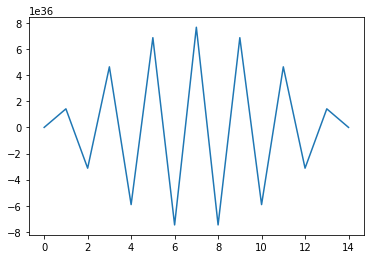

In [16]:
#Works if strictly ascending, doesn't have to be evenly spaced.
#Or just close enough? Maybe if it's just some close enough it works? I can't really tell.
#NO! It works when there are few enough entries that the boundaries can sort of force them into shape. Once it gets bigger than that, we blow up.
V = [x*0.07 for x in range(15)]
for i in range(1000):
  oldV = np.copy(V)
  V = smooth5(oldV, 0, 1)
  #print(V)
plt.plot([x for x in range(len(V))], V)

#### Uh oh! It blows up on a test input! How does it do on our questions?

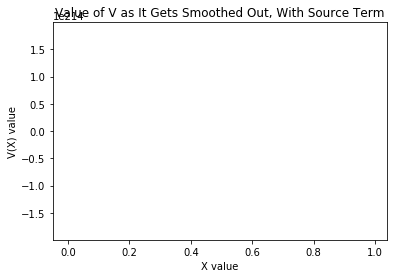

In [17]:
#Question 1
import random
from matplotlib import animation, rc, pyplot as plt

fig = plt.figure()
plt.title("Value of V as It Gets Smoothed Out, With Source Term")
plt.xlabel("X value")
plt.ylabel("V(X) value")

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
V = [random.random() for i in range(xgrid)]  # initialize V as a random

iterations=4000
ims = []

for iter in range(iterations):
    #My code
    oldV = V
    V = smooth5(oldV, 0, 1)
    
    if (iter % 10 == 0):
        im = plt.plot(xvals,V,color='black', label = "Iteration: {}".format(iter))
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

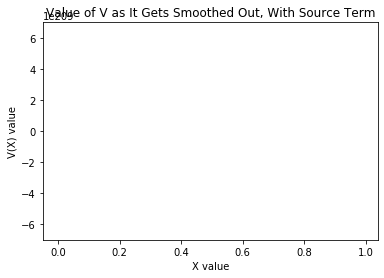

In [18]:
#Question 2
import random
from matplotlib import animation, rc, pyplot as plt

fig = plt.figure()
plt.title("Value of V as It Gets Smoothed Out, With Source Term")
plt.xlabel("X value")
plt.ylabel("V(X) value")

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
V = [random.random() for i in range(xgrid)]  # initialize V as a random

iterations=4000
ims = []
for iter in range(iterations):
    
    #My code
    oldV = V
    V = smooth5(oldV, 0, 0, src2)
    
    if (iter % 100 == 0):
        im = plt.plot(xvals,V,color='black', label = "Iteration: {}".format(iter))
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

### As we can see from our results above, naively just trying to run the stencil results in the stencil getting nowhere, and then utterly exploding. So this is no good. How do we get rid of the instability? It's caused by that its neighbour values can be extreme, and that any noise it produces is amplified as there's nothing to 'anchor' the noise against. This noise is taken by the next iteration and amplified repeatedly. How about we reduce the noise somehow, say by anchoring the value to the average of the new value and the current value, and to the 3 point stencil result?

In [19]:
"""
Trying to anchor the value.
"""
def smooth5V2(arr, start, end, src = lambda a: 0, epsilon = 1e-1):
  newArr = []
  newArrLen = len(arr)
  arrEnd = newArrLen-1

  a = 1 / (newArrLen)

  for i in range(newArrLen):
    if i == 0:
      newArr.append(start) #It's simplier than I thought; just straight up dictate it to be the start val
    elif i == 1:
      val = (arr[i-1] + arr[i+1] - a**2 * src(i*a))/2 #Just switch back to 2-point
      newArr.append(val)
    elif i == (arrEnd-1):
      val = (arr[i-1] + arr[i+1] - a**2 * src(i*a))/2 #Just switch back to 2 point
      newArr.append(val)
    elif i == (arrEnd):
      newArr.append(end) #It's just straight up the ending value
    else:
      val = (((-1)*arr[i-2] + 16*arr[i-1] + 16*arr[i+1] - arr[i+2] - 12 * a**2 * src(i*a))/30) #Here. I ran into instability here. IDK what's going on.
      val3p = (arr[i-1] + arr[i+1] - a**2 * src(i*a))/2

      avgVal = (arr[i] + arr[i-1] + arr[i+1] - (3/2) * a**2 * src(i*a))/3

      mixedVal = (val + (arr[i]))/2
      #Here, the anchor is the average of itself and the two surrounding values (plus a term to try and make the source driving term work), the 3 point stencil, and the 5 point stencil.
      newArr.append((avgVal + val + val3p)/3)

  return newArr

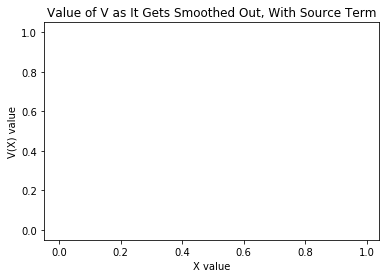

In [20]:
#Question 1
import random
from matplotlib import animation, rc, pyplot as plt

fig = plt.figure()
plt.title("Value of V as It Gets Smoothed Out, With Source Term")
plt.xlabel("X value")
plt.ylabel("V(X) value")

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
V = [random.random() for i in range(xgrid)]  # initialize V as a random

iterations = 5000
ims = []

for iter in range(iterations):
    #My code
    oldV = V
    V = smooth5V2(oldV, 0, 1)
    
    if (iter % 10 == 0):
        im = plt.plot(xvals,V,color='black', label = "Iteration: {}".format(iter))
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

### Yay, this works! Here, the anchor is the average of itself and the two surrounding values (plus a term to try and make the source driving term work), the 3 point stencil, and the 5 point stencil.

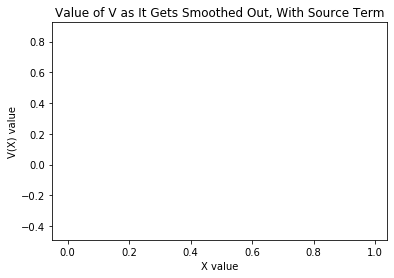

In [21]:
#Question 2
import random
from matplotlib import animation, rc, pyplot as plt

fig = plt.figure()
plt.title("Value of V as It Gets Smoothed Out, With Source Term")
plt.xlabel("X value")
plt.ylabel("V(X) value")

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
V = [random.random() for i in range(xgrid)]  # initialize V as a random

iterations=10000
ims = []
for iter in range(iterations):
    
    #My code
    oldV = V
    V = smooth5V2(oldV, 0, 0, src2)
    
    if (iter % 100 == 0):
        im = plt.plot(xvals,V,color='black', label = "Iteration: {}".format(iter))
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

In [22]:
print(V[50])

-0.42494096724141867


### If you compare this with the results from Q3, this failed, miserably. The value is incorrect; I drove it into the correct looking shape from a distance, but the specifics are all wrong for the driven function. Ok. Then what?

### Prof. Feder mentioned he averaged out the function to be itself and its neighbours. After a while, I finally understood this meant each array entry after a 5 point stencil application. How does that work?

In [23]:
"""
Version three. Averaging after the result.
This is what Prof. Feder Did!
"""
def smooth5V3(arr, start, end, src = lambda a: 0, epsilon = 1e-1):
  newArr = []
  newArrLen = len(arr)
  arrEnd = newArrLen-1

  a = 1 / (newArrLen)

  for i in range(newArrLen):
    if i == 0:
      newArr.append(start) #It's simplier than I thought; just straight up dictate it to be the start val
    elif i == 1:
      val = (arr[i-1] + arr[i+1] - a**2 * src(i*a))/2 #Just switch back to 2-point
      newArr.append(val)
    elif i == (arrEnd-1):
      val = (arr[i-1] + arr[i+1] - a**2 * src(i*a))/2 #Just switch back to 2 point
      newArr.append(val)
    elif i == (arrEnd):
      newArr.append(end) #It's just straight up the ending value
    else:
      val = (((-1)*arr[i-2] + 16*arr[i-1] + 16*arr[i+1] - arr[i+2] - 12 * a**2 * src(i*a))/30) #Here. I ran into instability here. IDK what's going on.
      newArr.append(val)
  #Method: Average out each of the points with itself and its neighbours.
  newArr2 = newArr
  for i in range(1, newArrLen-1):
    newArr2[i] = (newArr[i+1]+newArr[i]+newArr[i-1])/3

  return newArr2

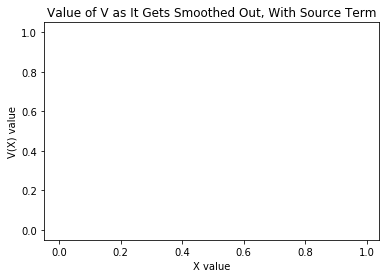

In [24]:
#Question 1
import random
from matplotlib import animation, rc, pyplot as plt

fig = plt.figure()
plt.title("Value of V as It Gets Smoothed Out, With Source Term")
plt.xlabel("X value")
plt.ylabel("V(X) value")

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
V = [random.random() for i in range(xgrid)]  # initialize V as a random

iterations = 5000
ims = []

for iter in range(iterations):
    #My code
    oldV = V
    V = smooth5V3(oldV, 0, 1)
    
    if (iter % 10 == 0):
        im = plt.plot(xvals,V,color='black', label = "Iteration: {}".format(iter))
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

#### This works and pretty damn fast. What about for the driven with source?

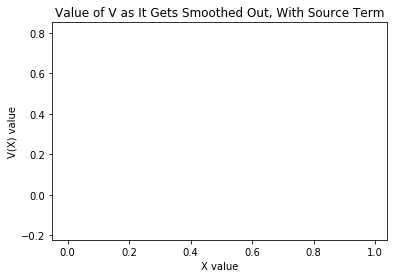

In [25]:
#Question 2
import random
from matplotlib import animation, rc, pyplot as plt

fig = plt.figure()
plt.title("Value of V as It Gets Smoothed Out, With Source Term")
plt.xlabel("X value")
plt.ylabel("V(X) value")

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
V = [random.random() for i in range(xgrid)]  # initialize V as a random

iterations=10000
ims = []
for iter in range(iterations):
    
    #My code
    oldV = V
    V = smooth5V3(oldV, 0, 0, src2)
    
    if (iter % 100 == 0):
        im = plt.plot(xvals,V,color='black', label = "Iteration: {}".format(iter))
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

#### This fails. We get the correct looking shape, but again the value is 100% WRONG! This highlights one of the problems with the stencil method. When it fails, it fails really hard, and appears utterly unrecoverable. If there is a way to both smooth out the oscilations and make the driven version work, it is beyond me. We have the correct shape and accuracy if there's no source, and it converges faster. But for the one with a source, this just doesn't work.

#Ok, last try. Averaging with only its neighbours, not itself.

In [26]:
"""
Version three. Averaging after the result.
"""
def smooth5V4(arr, start, end, src = lambda a: 0, epsilon = 1e-1):
  newArr = []
  newArrLen = len(arr)
  arrEnd = newArrLen-1

  a = 1 / (newArrLen)

  for i in range(newArrLen):
    if i == 0:
      newArr.append(start) #It's simplier than I thought; just straight up dictate it to be the start val
    elif i == 1:
      val = (arr[i-1] + arr[i+1] - a**2 * src(i*a))/2 #Just switch back to 2-point
      newArr.append(val)
    elif i == (arrEnd-1):
      val = (arr[i-1] + arr[i+1] - a**2 * src(i*a))/2 #Just switch back to 2 point
      newArr.append(val)
    elif i == (arrEnd):
      newArr.append(end) #It's just straight up the ending value
    else:
      val = (((-1)*arr[i-2] + 16*arr[i-1] + 16*arr[i+1] - arr[i+2] - 12 * a**2 * src(i*a))/30) #Here. I ran into instability here. IDK what's going on.
      newArr.append(val)
  #Method: Average out each of the points with itself and its neighbours.
  newArr2 = newArr
  for i in range(1, newArrLen-1):
    newArr2[i] = (arr[i-1] + arr[i+1] - a**2 * src(i*a))/2

  return newArr2

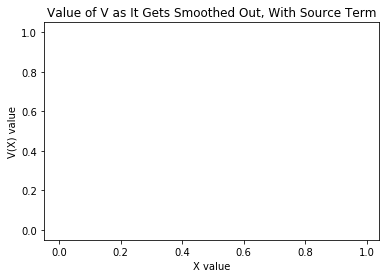

In [27]:
#Question 1
import random
from matplotlib import animation, rc, pyplot as plt

fig = plt.figure()
plt.title("Value of V as It Gets Smoothed Out, With Source Term")
plt.xlabel("X value")
plt.ylabel("V(X) value")

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
V = [random.random() for i in range(xgrid)]  # initialize V as a random

iterations = 5000
ims = []

for iter in range(iterations):
    #My code
    oldV = V
    V = smooth5V4(oldV, 0, 1)
    
    if (iter % 10 == 0):
        im = plt.plot(xvals,V,color='black', label = "Iteration: {}".format(iter))
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

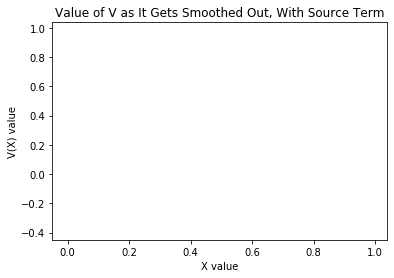

In [28]:
#Question 2
import random
from matplotlib import animation, rc, pyplot as plt

fig = plt.figure()
plt.title("Value of V as It Gets Smoothed Out, With Source Term")
plt.xlabel("X value")
plt.ylabel("V(X) value")

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
V = [random.random() for i in range(xgrid)]  # initialize V as a random

iterations=10000
ims = []
for iter in range(iterations):
    
    #My code
    oldV = V
    V = smooth5V4(oldV, 0, 0, src2)
    
    if (iter % 100 == 0):
        im = plt.plot(xvals,V,color='black', label = "Iteration: {}".format(iter))
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

### Ok, this works, but... it's not apparently better than the 3 point stencil method. All we've done is apply 5 stencil, then 3 stencil right after to get rid of some of the noise. And even then, we can see a lot of the jaggedness charecteristic of 3-stencil. So, accurate results in the long run, but not obviously better.

### What about the Matrix Method?

In [29]:
#Q3
import numpy as np
import matplotlib.pyplot as plt

def genMat5(N, start, end):
  mat = []
  for i in range(N):
    row = [0]*(i-1) + [-1] + [16] + [-30] + [16] + [-1] + [0]*(N-i-1)
    row = row[1:len(row)-2]
    mat.append(row)
  #Now do something funny to the first and last rows.
  # Make matrix that enforces endpoint conditions??
  fstRowi = 0
  sndRowi = 1
  sndLstRowi = len(mat)-1-1
  lstRowi = len(mat)-1
  mat[fstRowi] = [1] + [0]*(N-1)
  mat[lstRowi] = [0]*(N-1) + [1]

  mat[sndRowi] = [1] + [-2] + [1] + [0]*(N-3)
  mat[sndLstRowi] = [0]*(N-3) + [1] + [-2] + [1]
  #Now the other rows.

  return mat

In [30]:
genMat5(10, 0, 1)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, -2, 1, 0, 0, 0, 0, 0, 0, 0],
 [-1, 16, -30, 16, -1, 0, 0, 0, 0, 0],
 [0, -1, 16, -30, 16, -1, 0, 0, 0, 0],
 [0, 0, -1, 16, -30, 16, -1, 0, 0, 0],
 [0, 0, 0, -1, 16, -30, 16, -1, 0, 0],
 [0, 0, 0, 0, -1, 16, -30, 16, -1, 0],
 [0, 0, 0, 0, 0, -1, 16, -30, 16, -1],
 [0, 0, 0, 0, 0, 0, 0, 1, -2, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

Text(0, 0.5, 'V(X) value')

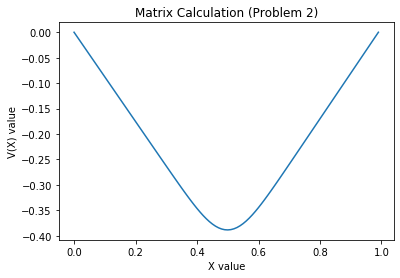

In [31]:
#Q3 - Q2 as Mat

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
a = 1/xgrid

start = 0
end = 0

middleResults = []
for i in range(2, xgrid-2):
  pumpVal = src2(xvals[i])
  pumpVal = pumpVal*12*a**2
  middleResults.append(pumpVal)

rhoVec = [start]*2 + middleResults + [end]*2

resultV = np.linalg.solve(genMat5(xgrid, start, end), rhoVec)

plt.plot(xvals, resultV)
plt.title("Matrix Calculation (Problem 2)")
plt.xlabel("X value")
plt.ylabel("V(X) value")

In [32]:
resultV[50]

-0.3886377902151497

### This is right!

Text(0, 0.5, 'V(X) value')

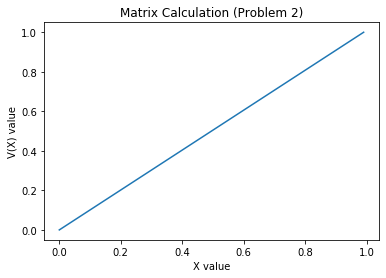

In [33]:
#Q3 - Q2 as Mat

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]
a = 1/xgrid

start = 0
end = 1

rhoVec = [start]*1 + [0]*(xgrid-2) + [end]*1

resultV = np.linalg.solve(genMat5(xgrid, start, end), rhoVec)

plt.plot(xvals, resultV)
plt.title("Matrix Calculation (Problem 2)")
plt.xlabel("X value")
plt.ylabel("V(X) value")

#### Yet, using the matrix solving method, the 5 point stencil just works. See?

**Problem 5 (10 points):** Consider again the inhomogeneous Poisson equation above, with the same boundary conditions and source term as in Problem 3, but now using the Fourier trick. Solve the problem by utilizing a canned linear systems solver using the matrix $M$, and by direct inversion of the matrix. Repeat the calculation by instead solving for $r(n)$. Compare the solutions with those obtained in Problem 3. Why do you think that the results are so off? What do you think would fix the situation?

### So, my group attempted this question, and the following is our code as well as the closest we got to anything. In short, our results are extremely off. We're talking about wrong sign, shape, and order of magnitude wrong. The code doesn't seem particularly wrong to us, which means that there's something wrong with the method itself.

In [34]:
#Q5:
import numpy as np
import matplotlib.pyplot as plt
#Key: M phi = rho  (p).
#Q2
"""
Source Term
"""
def src2(x):
  expVal = (-1)*100*((x-(1/2))**2)
  return 10*np.exp(expVal)

"""
Value of any given entry of an N by N matrix.
"""
def matVal(row, column,N):
  exponent = 2*np.pi*1j*row*column/N
  return column**2 * np.exp(exponent)

"""
Generates the fourier matrix.
"""
def genMatM(N):
  mat = []
  rootN = 1/np.sqrt(N)
  for i in range(1,N+1):
    row = []
    for j in range(1,N+1):
      row.append(matVal(i, j, N)*rootN)
    mat.append(row)
  return mat

"""
From the fourier phi results, and the current x and L, generate the V value.
"""
def vVal2(x, L, fouriers):
  N = len(fouriers)
  rootN = 1/np.sqrt(N)
  
  sum = 0
  for n in range(0, N):
    expo = np.pi*1j*(n+1)*x/L
    expEval = np.exp(expo) * fouriers[n]
    sum += expEval
  return sum

"""
From the fourier phi results, and the current x index, generate the V value.
IT'S J, NOT X. SO IT'S INTEGERS FROM 1 TO N.
"""
def vVal(j, fouriers):
  N = len(fouriers)
  rootN = 1/np.sqrt(N)
  
  sum = 0
  for n in range(0, N):
    expo = np.pi*1j*(n+1)*j/N
    expEval = np.exp(expo) * fouriers[n]
    sum += expEval
  return sum

In [35]:
#Testing: This seems to work
genMatM(5)

[[(0.13819660112501053+0.42532540417601994j),
  (-1.4472135954999577+1.0514622242382674j),
  (-3.2562305898749053-2.365790004536101j),
  (2.2111456180001667-6.80520646681632j),
  (11.180339887498949-2.738393491321013e-15j)],
 [(-0.3618033988749894+0.26286555605956685j),
  (0.5527864045000417-1.70130161670408j),
  (1.243769410125096+3.8279286375841792j),
  (-5.788854381999833-4.205848896953066j),
  (11.180339887498949-5.476786982642026e-15j)],
 [(-0.36180339887498947-0.26286555605956674j),
  (0.5527864045000426+1.7013016167040798j),
  (1.243769410125093-3.8279286375841806j),
  (-5.78885438199983+4.205848896953072j),
  (11.180339887498949-8.215180473963039e-15j)],
 [(0.13819660112501042-0.42532540417602j),
  (-1.4472135954999583-1.0514622242382665j),
  (-3.256230589874904+2.3657900045361027j),
  (2.2111456180001734+6.805206466816317j),
  (11.180339887498949-1.0953573965284053e-14j)],
 [(0.4472135954999579-1.0953573965284052e-16j),
  (1.7888543819998317-8.762859172227242e-16j),
  (4.02492

$$V(x)=\frac{1}{\sqrt{N}}\sum_n e^{i2\pi nx/L}\phi(n).$$

$$V(j)=\frac{1}{\sqrt{N}}\sum_ne^{i 2\pi nj/N}\phi(n).$$

C:\Users\Orko\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[(4.418934959415768e-11+3.267728315382909e-12j), (4.1640041563299537e-11+8.622482598525027e-12j), (3.901324967145801e-11+1.2334933207865637e-11j), (3.6437574532970176e-11+1.5288484290899527e-11j), (3.391599308935008e-11+1.7724710057152613e-11j), (3.144899779021222e-11+1.9766288139922072e-11j), (2.9036727366500864e-11+2.1488652027980805e-11j), (2.6679233351881633e-11+2.2943223907852555e-11j), (2.4376538508186438e-11+2.4167455887575173e-11j), (2.2128654168384712e-11+2.5189926683713187e-11j), (1.9935586495736365e-11+2.6033216978532242e-11j), (1.779733907769047e-11+2.671565922216165e-11j), (1.571391411831632e-11+2.7252465302237137e-11j), (1.368531303273648e-11+2.765648678712088e-11j), (1.1711536763428084e-11+2.7938746500458296e-11j), (9.792585957820591e-12+2.810882159382703e-11j), (7.928461072614374e-12+2.8175126709409494e-11j), (6.119162437456082e-12+2.814512788758257e-11j), (4.3646902951160315e-12+2.8025507225198594e-11j), (2.665044827582403e-12+2.7822291726470644e-11j), (1.0202261734455

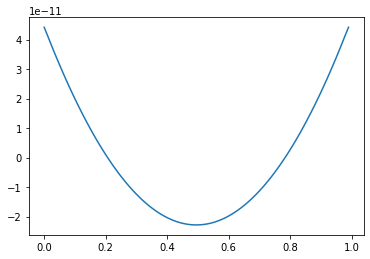

In [36]:
xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]

middleResults = []
for i in range(0, xgrid):
  pumpVal = src2(i)
  pumpVal = pumpVal
  middleResults.append(pumpVal)

phi = np.linalg.solve(genMatM(xgrid), middleResults)

vVals = []
for i in range(xgrid):
  vVals.append(vVal(2*(i+2), phi))

plt.plot(xvals, vVals)

print(vVals)

### Almost a correct shape, but it's not even the right order of magnitude.

[(4.4189349594157336e-11+3.2677283153827754e-12j), (4.164004156329921e-11+8.622482598524856e-12j), (3.901324967145769e-11+1.2334933207865444e-11j), (3.643757453296985e-11+1.5288484290899317e-11j), (3.391599308934976e-11+1.7724710057152373e-11j), (3.144899779021194e-11+1.9766288139921817e-11j), (2.903672736650061e-11+2.1488652027980533e-11j), (2.667923335188138e-11+2.2943223907852277e-11j), (2.4376538508186218e-11+2.4167455887574875e-11j), (2.212865416838451e-11+2.518992668371288e-11j), (1.9935586495736174e-11+2.6033216978531928e-11j), (1.7797339077690307e-11+2.671565922216132e-11j), (1.571391411831616e-11+2.72524653022368e-11j), (1.3685313032736342e-11+2.7656486787120535e-11j), (1.1711536763427965e-11+2.7938746500457947e-11j), (9.792585957820507e-12+2.8108821593826653e-11j), (7.928461072614312e-12+2.8175126709409113e-11j), (6.119162437456045e-12+2.814512788758217e-11j), (4.364690295116024e-12+2.8025507225198187e-11j), (2.6650448275824256e-12+2.7822291726470237e-11j), (1.02022617344565e

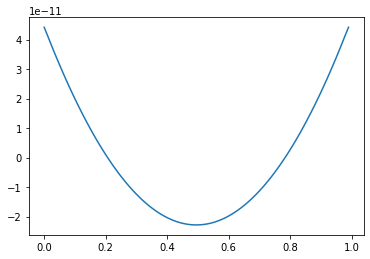

In [37]:
#Direct matrix inversion

xgrid = 100  # number of sites in x
xvals = [i/xgrid for i in range(xgrid)]

middleResults = []
for i in range(0, xgrid):
  pumpVal = src2(i)
  pumpVal = pumpVal
  middleResults.append(pumpVal)

phi = np.dot(np.linalg.inv(genMatM(xgrid)),middleResults)

vVals = []
for i in range(xgrid):
  vVals.append(vVal(2*(i+2), phi))

plt.plot(xvals, vVals)

print(vVals)

#### This is finagled. It doesn't actually work, and the values are all wrong, and it only somewhat looks like the answer. But it's all I've got.

This can be simplified slightly by noting that $a=L/N$:
$$M=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi/N} & 4e^{i 4\pi/N} & \cdots & N^2e^{i 2\pi}\cr
e^{i 4\pi/N} & 4e^{i 8\pi/N} & \cdots & N^2e^{i 4\pi}\cr
\vdots & \vdots & \ddots & \vdots\cr
e^{i 2\pi} & 4e^{i 4\pi} & \cdots & N^2e^{i 2\pi N}\cr
\end{pmatrix}
=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi/N} & 4e^{i 4\pi/N} & \cdots & N^2\cr
e^{i 4\pi/N} & 4e^{i 8\pi/N} & \cdots & N^2\cr
\vdots & \vdots & \ddots & \vdots\cr
1 & 4 & \cdots & N^2\cr
\end{pmatrix}.$$


### Orko here, so upon reading through Introduction to Fourier Analysis and Wavelets by Mark A.Pinsky, and numerous testing I believe the reason why the values of the 

**Fourier coefficients or discrete fourier transformations follow the formula below**

$$\begin{equation}
f(n) = \frac{1}{2\pi}\int{f(\theta)e^{-in\theta}}d\theta
\end{equation}$$ 

$$\phi(n)=-\left(\frac{L}{2\pi n}\right)^2r(n).$$
Given that we can solve for $r(n)$ directly from the source term,
$$r(n)=\frac{1}{\sqrt{N}}\sum_je^{-i 2\pi nj/N}\rho(j),$$
this allows for the direct solution for $\phi(n)$ and therefore of $V(x)$,
$$V(j)=\frac{1}{\sqrt{N}}\sum_ne^{i 2\pi nj/N}\phi(n).$$

In [38]:
"""
Functions meant for direct calculation.
"""

def dirRn(n, N, src):
  rootN = 1/np.sqrt(N)

  sum = 0
  for i in range(1, N+1):
    expVal = -1j * 2 * np.pi * n * i/N
    srcVal = src(i)
    val = np.exp(expVal) * srcVal
    sum += val
  
  return rootN*sum

def dirPhi(n, N, src, L = 1):
  preFac = (-L/(2*np.pi*n))**2
  return preFac*dirRn(n, N, src)

def dirV(n, N, src, L = 1):
  rootN = 1/np.sqrt(N)

  sum = 0
  for i in range(1, N+1):
    expVal = 1j * 2 * np.pi * n * i/N
    phiVal = dirPhi(i, N, src, L)
    val = np.exp(expVal) * phiVal
    sum += val
  return rootN*sum

In [39]:
dirV(50, 100, src2)

(-2.889675520193324e-14+1.5316685250925332e-15j)

### As you can see and test, the values are rather nonsensical. I don't  know what went wrong, or rather, how anything can go right.

### But why exactly did it go wrong? Well, firstly, we don't actually have multiple periods with which to have the fourier transform try and transform it with. We only have one, and so the transform method numerically might fail because of that. However, we don't know. Orko says he found a theorem saying that this is it. So I'll have him put it here.


### Orko here, so upon reading through Introduction to Fourier Analysis and Wavelets by Mark A.Pinsky, and numerous testing I believe the reason why the values of the why there is such variation is the matrix formula does not allow convergence and the V function is not periodic in nature.

### This is explained in "Introduction to Fourier Analysis and Wavelets by Mark A.Pinsky", where it is stated that the fourier coefficients must follow the following mathematical properities


**Fourier coefficients or discrete fourier transformations follow the formula below:**

$$\begin{equation}
f(n) = \frac{1}{2\pi}\int{f(\theta)e^{-in\theta}}d\theta
\end{equation}$$ 

**where $f(\theta)$ is a periodic function with a period $2\pi$ that converges in range of 0 to $2\pi n$**

**applying the fourier transformation**

$$\begin{equation}
f(\theta) = \frac{1}{2\pi}\int{f(n)e^{-in\theta}}d\theta
\end{equation}$$ 

**Moving from integer space to summation space**

$$\begin{equation}
f(\theta) = \frac{1}{2\pi}\sum_{n}^N{f(n)e^{-in\theta}}
\end{equation}$$ 


**Let us follow the following mathematical procedure** 

Given, 
$$ V(j) = \frac{1}{\sqrt{N}}\sum_{n}e^{i2\pi j/N}\phi(n)$$

$$\phi(n) = M^{-1}\rho$$

$$M=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi/N} & 4e^{i 4\pi/N} & \cdots & N^2e^{i 2\pi}\cr
e^{i 4\pi/N} & 4e^{i 8\pi/N} & \cdots & N^2e^{i 4\pi}\cr
\vdots & \vdots & \ddots & \vdots\cr
e^{i 2\pi} & 4e^{i 4\pi} & \cdots & N^2e^{i 2\pi N}\cr
\end{pmatrix}
=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi/N} & 4e^{i 4\pi/N} & \cdots & N^2\cr
e^{i 4\pi/N} & 4e^{i 8\pi/N} & \cdots & N^2\cr
\vdots & \vdots & \ddots & \vdots\cr
1 & 4 & \cdots & N^2\cr
\end{pmatrix}.$$

**Converting $V(n)$ to $V(\theta)$, some similarties between $V(\theta)$ and $f(\theta)$ will emerge**

Let the following happen: 

$$\theta = \frac{2j\pi}{N}$$
$$j = \frac{\theta N}{2\pi}$$


$$ V(\theta) = \frac{1}{\sqrt{N}}\sum_{n}e^{\theta}\phi(n)$$

**Now $V(\theta)$ is the symmetric to $f(\theta)$, however, the question is $\phi(n)$ convergent like $f(n)$**

**To understand this lets rewrite $V(\theta)$ to have $\phi(n)$ reflect its components**

$$ V(\theta) = \frac{1}{\sqrt{N}}\sum_{n}e^{i\theta} M^{-1}\rho$$

**Now note, $M^{-1}$ is not convergent, this is because a convergent matrix is given in the following format:**


$${\displaystyle \lim _{k\to \infty }(\mathbf {T} ^{k})_{ij}=0,}$$

**where an example is as follows:**
 
$$\begin{align}
& \mathbf{T} = \begin{pmatrix}
\frac{1}{4} & \frac{1}{2} \\[4pt]
0 & \frac{1}{4}
\end{pmatrix}.
\end{align}$$

#### $M$ does not match that format as such $M^{-1}$ will not be convergent, on top of that $V(\theta)$ is not periodic as such the matrix should fail the fourier trick as it does not meet the fourier requirements. And it has failed in the previous question. 

#### This may be one plausable explainations of why the mechanics of the Fourier transform ensure non-periodic must follow Finite approximation and not fourier analysis to deduce derivatives numerically.
 

### THE THEORY

It is worthwhile to consider the special case of boundary conditions, a situation that arises often in physics. Then we can expand the potential in a Fourier series
$$V(x)=\frac{1}{\sqrt{N}}\sum_k e^{ikx}\phi(k).$$
Because the potential is the solution of a second-order differential equation, and also periodic, the value of the potential and its derivative coincide at the left and right boundaries, i.e. $V(0)=V(L)$ and $V'(0)=V'(L)$. The first condition gives 
$$\frac{1}{\sqrt{N}}\sum_k\phi(k)=\frac{1}{\sqrt{N}}\sum_k e^{ikL}\phi(k)=V.$$
To ensure that both terms on the left hand side are equal, we must choose wave vectors $k=2\pi n/L$, where $n=1,2,\ldots,N$, and therefore
$$V(x)=\frac{1}{\sqrt{N}}\sum_n e^{i2\pi nx/L}\phi(n).$$
It's easy to verify that the second boundary condition is also automatically satisfied.  The inhomogeneous Poisson equation then becomes
$$\frac{d^2}{d x^2}V(x)=\frac{d^2}{d x^2}\frac{1}{\sqrt{N}}\sum_n e^{i 2\pi nx/L}\phi(n)=-\frac{1}{\sqrt{N}}\sum_n\left(\frac{2\pi n}{L}\right)^2e^{i 2\pi nx/L}\phi(n)=\rho(x).$$
Then, for each $x_j=aj$, $j=1,2,\ldots,N$, the equation becomes
$$\frac{1}{\sqrt{N}}\sum_n n^2e^{i 2\pi a nj/L}\phi(n)=-\left(\frac{L}{2\pi}\right)^2\rho(j).$$

The Fourier transform has transformed the inhomogeneous second-order differential equation to a set of algebraic equations. Suppose that the $\phi(n)$ is a vector of length $N$ with terms $\phi=[\phi(0),\phi(1),\ldots,\phi(N-1)]$ and likewise for the source term, $\rho=[\rho(0),\rho(1),\ldots,\rho(N-1)]$. Then the above equation reads as $M\phi=\rho$, where $M$ is an $N\times N$ matrix. For the example above, the matrix is
$$M=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi a/L} & 4e^{i 2\pi a 2/L} & \cdots & N^2e^{i 2\pi a N/L}\cr
e^{i 2\pi a 2/L} & 4e^{i 2\pi a 4/L} & \cdots & N^2e^{i 2\pi a 2N/L}\cr
\vdots & \vdots & \ddots & \vdots\cr
e^{i 2\pi a N/L} & 4e^{i 2\pi a 2N/L} & \cdots & N^2e^{i 2\pi a N^2/L}\cr
\end{pmatrix}$$
This can be simplified slightly by noting that $a=L/N$:
$$M=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi/N} & 4e^{i 4\pi/N} & \cdots & N^2e^{i 2\pi}\cr
e^{i 4\pi/N} & 4e^{i 8\pi/N} & \cdots & N^2e^{i 4\pi}\cr
\vdots & \vdots & \ddots & \vdots\cr
e^{i 2\pi} & 4e^{i 4\pi} & \cdots & N^2e^{i 2\pi N}\cr
\end{pmatrix}
=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi/N} & 4e^{i 4\pi/N} & \cdots & N^2\cr
e^{i 4\pi/N} & 4e^{i 8\pi/N} & \cdots & N^2\cr
\vdots & \vdots & \ddots & \vdots\cr
1 & 4 & \cdots & N^2\cr
\end{pmatrix}.$$
The goal is to solve for $\phi$ given $M$ and $\rho$. This can be done in (at least) two ways. One is to call a standard linear system solver, for example numpy.linalg.solve. Alternatively, as long as $M$ isn't singular (i.e. if its determinant isn't zero), then one can obtain $\phi$ directly by inverting $M$: $\phi=M^{-1}\rho$; for this one can employ numpy.linalg.inv.

There's another way to solve the system using the Fourier method. One can also expand the source term in a Fourier series,
$$\rho(j)=\frac{1}{\sqrt{N}}\sum_n e^{i2\pi nj/N}r(n),$$
where $r(n)$ is the (discrete) Fourier transform of $\rho(x)$. Then
$$\frac{1}{\sqrt{N}}\sum_n n^2e^{i 2\pi nj/N}\phi(n)=-\left(\frac{L}{2\pi}\right)^2\frac{1}{\sqrt{N}}\sum_n e^{i2\pi nj/N}r(n),$$
which gives
$$\phi(n)=-\left(\frac{L}{2\pi n}\right)^2r(n).$$
Given that we can solve for $r(n)$ directly from the source term,
$$r(n)=\frac{1}{\sqrt{N}}\sum_je^{-i 2\pi nj/N}\rho(j),$$
this allows for the direct solution for $\phi(n)$ and therefore of $V(x)$,
$$V(j)=\frac{1}{\sqrt{N}}\sum_ne^{i 2\pi nj/N}\phi(n).$$

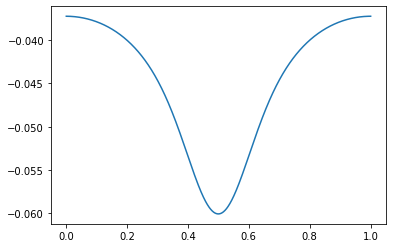

In [40]:
#Q5: Trying to do this using Numpy's Fast Fourier Transform instead of our own matrixes.

import numpy.fft as ft
import numpy as np

xgrid = 1000
xvals = [x/xgrid for x in range(1, xgrid+1)]

L =  1

#By middle results, I mean the r(n) vector
middleResults = []
for i in range(xgrid):
  pumpVal = src2(xvals[i])
  pumpVal = pumpVal
  middleResults.append(pumpVal)

rn = ft.fft(middleResults)

phi = []
for i in range(len(rn)):
  phi.append((-1)*((L/(2*np.pi*(i+1)))**2)*rn[i])

vn =ft.ifft(phi)

#Here's  the result.
plt.figure()
plt.plot(xvals, vn)

### Almost right! Huh. But only almost. I'm stuck and don't know where to go from here. This is for the direct solutuon thing.

#### Orko here again, and as John has shown the Fourier trick for r(n) is a better approximation to the function than that was achieved utilizing the numpy solver or direct inversion of the matrix, this is because a non-convergent matrix was not used, but a python fast fourier algorithm was used instead to get the results. 

#### However as stated above, the limitations of this approach is the function is not periodic and does not repeat after a fixed interval, as such this approach too has failed to get the right values.


## Now the reason why we think that our results followed the behavior of the results of the Finite approximation process but not the value of replication of the process is because the mechanics of the Fourier transformation process does not work on non-periodic non-convergent functions, as V(x) seems to be for the boundary conditions V(0) = 0 and V(1) =0